In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Velocidades:
    def __init__(self, datos, setpoints):
        """Constructor para datos"""   
        datosCeldas = pd.read_csv(datos)
        self.setpoints = pd.read_csv(setpoints)
        self.entrada = getVelocidad(datosCeldas, "Header_Speed", 100)
        self.salida = getVelocidad(datosCeldas, "Robot_Speed", 100)
        #renombrar a velocidad
        self.entrada.rename( columns={'Header_Speed' :'Velocidad'}, inplace=True)
        self.salida.rename( columns={'Robot_Speed' :'Velocidad'}, inplace=True)
        
    def getVelocidad(datos, columna, limite):
        datos = datos[datos[columna].notna()]
        datos = datos.loc[(datos[columna]>limite)]
        datos = datos[["IdCelda", columna]]
        return datos
            
    def printDF(self,df):
        # pandas settings are local to with statement.
        with pd.option_context('display.max_rows', None,
                               'display.max_columns', None,
                               'display.precision', 3,
                               ):
            print(df)
    
    def getSummary(self):
        summaryEntrada = self.entrada.groupby("IdCelda").median().reset_index()
        summarySalida = self.salida.groupby("IdCelda").median().reset_index()
        
        summaryEntrada["Velocidad"] = round(summaryEntrada["Velocidad"], 0)
        summarySalida["Velocidad"] = round(summarySalida["Velocidad"], 0)
        
        summaryEntrada["Velocidad"] = pd.to_numeric(summaryEntrada["Velocidad"], downcast='signed')
        summarySalida["Velocidad"] = pd.to_numeric(summarySalida["Velocidad"], downcast='signed')
        
        summary = setpoints.merge(sumaryEntrada, on='IdCelda', how="left").merge(sumarySalida, on="IdCelda", how="left", suffixes=(' Inicio', ' Salida'))
        
        print("Concentrado")
        print("=========================================")
        self.printDF(summary)
            
    
    def getSetpoint(self, linea):
        setpoint = self.setpoints[self.setpoints["IdCelda"]==linea].Setpoint.squeeze()
        
        print("=========================================")
        print("La velocidad establecida en esta linea es: ", setpoint, " clavos por minuto")
        print("=========================================\n")
        
    def compare(self, linea, opcion):
        entrada = self.entrada[self.entrada["IdCelda"]==linea]["Velocidad"]
        salida = self.salida[self.salida["IdCelda"]==linea]["Velocidad"]
        if opcion == "text":
            e=entrada.describe()
            s=salida.describe()
            print("Velocidad primera maquina")
            print("=========================================")
            self.printDF(e)
            
            print("\nVelocidad última maquina")
            print("=========================================")
            self.printDF(s)
            
        elif opcion == "graf":            
            fig = plt.figure()
            ax = fig.add_subplot(111)

            ax.hist(entrada, bins=10, edgecolor='None', alpha = 0.8, label="entrada")
            ax.hist(salida, bins=10, edgecolor='None', alpha = 0.8, label="salida")
            
            plt.legend(prop ={'size': 10})
            
            
            print("\nHistograma combinado")
            print("=========================================")
            plt.show()
        else:
            print("Opcion incorrecta. Las opciones disponibles son: text, graf")
        

La velocidad establecida en esta linea es:  1343  clavos por minuto

Concentrado
    IdCelda           Descripcion  Setpoint  Velocidad Inicio  \
0        26   PB COLLATED CELL #8      1299            1397.0   
1        28  PB COLLATED CELL #10       986               NaN   
2        29  PB COLLATED CELL #11      1257               NaN   
3        30  PB COLLATED CELL #12      1679               NaN   
4        31  PB COLLATED CELL #13      1310            1315.0   
5        33  PB COLLATED CELL #14      1343            1401.0   
6        34  PB COLLATED CELL #15      1330            1339.0   
7        35  PB COLLATED CELL #16       939             939.0   
8        38  PB COLLATED CELL #18       927            1063.0   
9       106  PB COLLATED CELL #68      1445            1683.0   
10      110  PB COLLATED CELL #71      1341              80.0   
11      112  PB COLLATED CELL #73      1283            1283.0   

    Velocidad Salida  
0                NaN  
1                NaN  
2   

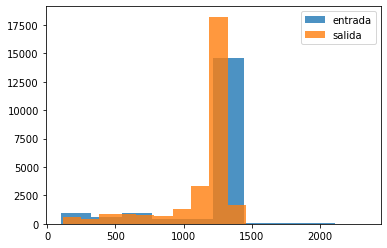

In [410]:
velocidades=Velocidades("Datos_Celdas.csv", "SetPoints.csv")
velocidades.getSetpoint(33)
velocidades.getSummary()
velocidades.compare(33, "text")
velocidades.compare(33, "graf")

In [407]:
velocidades.getSummary()

Concentrado
    IdCelda           Descripcion  Setpoint  Velocidad Inicio  \
0        26   PB COLLATED CELL #8      1299            1397.0   
1        28  PB COLLATED CELL #10       986               NaN   
2        29  PB COLLATED CELL #11      1257               NaN   
3        30  PB COLLATED CELL #12      1679               NaN   
4        31  PB COLLATED CELL #13      1310            1315.0   
5        33  PB COLLATED CELL #14      1343            1401.0   
6        34  PB COLLATED CELL #15      1330            1339.0   
7        35  PB COLLATED CELL #16       939             939.0   
8        38  PB COLLATED CELL #18       927            1063.0   
9       106  PB COLLATED CELL #68      1445            1683.0   
10      110  PB COLLATED CELL #71      1341              80.0   
11      112  PB COLLATED CELL #73      1283            1283.0   

    Velocidad Salida  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4             1288.0  
5   

In [328]:
entrada 

,IdCelda,Header_Speed
1492,34,125.048544
1496,34,451.262136
1499,34,348.737864
1530,31,1311.974110
1542,31,1313.268608
...,...,...
443180,35,940.650406
443182,34,1341.359223
443183,34,1341.359223
443188,35,940.650406


In [329]:
salida 

,IdCelda,Robot_Speed
1583,31,700.0
1590,31,1260.0
1593,33,756.0
1596,31,1288.0
1599,31,868.0
...,...,...
443182,34,308.0
443183,34,308.0
443184,33,980.0
443188,35,896.0


In [382]:
sumarySalida = salida.groupby("IdCelda").median().reset_index()

In [345]:
setpoints

,IdCelda,Descripcion,Setpoint
0,26,PB COLLATED CELL #8,1299
1,28,PB COLLATED CELL #10,986
2,29,PB COLLATED CELL #11,1257
3,30,PB COLLATED CELL #12,1679
4,31,PB COLLATED CELL #13,1310
5,33,PB COLLATED CELL #14,1343
6,34,PB COLLATED CELL #15,1330
7,35,PB COLLATED CELL #16,939
8,38,PB COLLATED CELL #18,927
9,106,PB COLLATED CELL #68,1445


In [361]:
sumaryEntrada=entrada.groupby("IdCelda").median().reset_index()

In [369]:
sumaryEntrada["Velocidad"] = round(sumaryEntrada["Velocidad"], 0)
sumaryEntrada

,IdCelda,Velocidad
0,26,1397.0
1,31,1315.0
2,33,1401.0
3,34,1339.0
4,35,939.0
5,38,1063.0
6,106,1683.0
7,110,80.0
8,112,1283.0


In [377]:
sumaryEntrada["Velocidad"] = pd.to_numeric(sumaryEntrada["Velocidad"], downcast='signed')
sumaryEntrada

,IdCelda,Velocidad
0,26,1397
1,31,1315
2,33,1401
3,34,1339
4,35,939
5,38,1063
6,106,1683
7,110,80
8,112,1283


In [384]:
setpoints.merge(sumaryEntrada, on='IdCelda', how="left").merge(sumarySalida, on="IdCelda", how="left", suffixes=(' Inicio', ' Salida'))

,IdCelda,Descripcion,Setpoint,Velocidad Inicio,Velocidad Salida
0,26,PB COLLATED CELL #8,1299,1397.0,NaN
1,28,PB COLLATED CELL #10,986,NaN,NaN
2,29,PB COLLATED CELL #11,1257,NaN,NaN
3,30,PB COLLATED CELL #12,1679,NaN,NaN
4,31,PB COLLATED CELL #13,1310,1315.0,1288.0
5,33,PB COLLATED CELL #14,1343,1401.0,1260.0
6,34,PB COLLATED CELL #15,1330,1339.0,1232.0
7,35,PB COLLATED CELL #16,939,939.0,868.0
8,38,PB COLLATED CELL #18,927,1063.0,868.0
9,106,PB COLLATED CELL #68,1445,1683.0,NaN


In [428]:
10 in setpoints.IdCelda.unique()

False

In [424]:
setpoints[["IdCelda"]].unique()


AttributeError: 'DataFrame' object has no attribute 'unique'

In [356]:
salida.groupby("IdCelda").median()

,Velocidad
IdCelda,
31,1288.0
33,1260.0
34,1232.0
35,868.0
38,868.0
112,1064.0


In [357]:
np.percentile(VelocidadRobot["Robot_Speed"], 50)

1120.0

In [182]:
np.percentile(VelocidadHeader[VelocidadHeader["IdCelda"]==34][["Header_Speed"]], 50)

1339.029126

array([[<AxesSubplot:title={'center':'Robot_Speed'}>]], dtype=object)

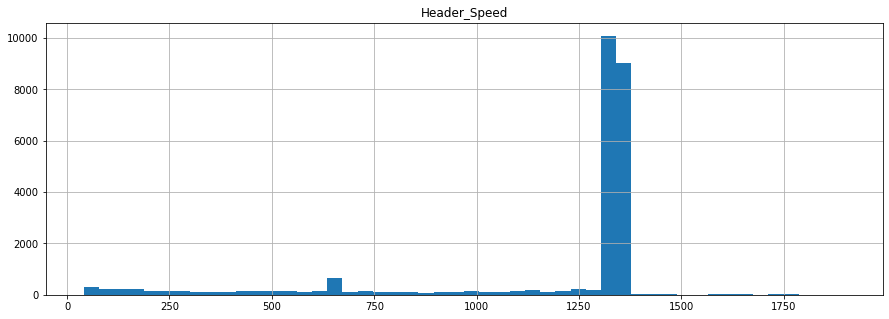

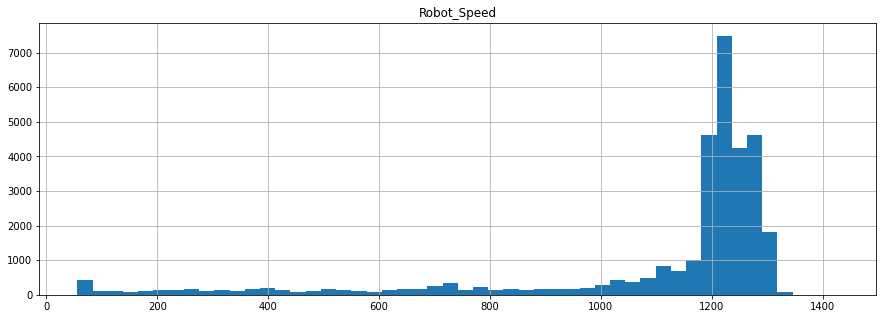

In [186]:
VelocidadHeader[VelocidadHeader["IdCelda"]==34][["Header_Speed"]].hist(bins=50, figsize=(15,5))
VelocidadRobot[VelocidadRobot["IdCelda"]==34][["Robot_Speed"]].hist(bins=50, figsize=(15,5))

In [63]:
concatenado=pd.concat([VelocidadHeader,VelocidadRobot], axis=0) #concatenacion de 2 datasets en el eje x (axis=1)
concatenado

,id,IdCelda,Header_Status,Header_Speed,Header_Count,Threader_Status,Collator_Status,Vision_Strip_Status,Vision_Strip_Count,Vision_Strip_Rejectad,Robot_Status,Robot_Speed,Robot_Nail_Production,Robot_Box_Production,Robot_Box_Completed_Count,FechaHoraAvisor,FechaServidorBD
1499,892743,34,1.0,161.0,172.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9908416.0,2357.0,NaN,07:22.5,07:22.3
1504,892748,34,0.0,581.0,583.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9908416.0,2357.0,NaN,08:08.3,08:08.0
1507,892751,34,0.0,449.0,583.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9908416.0,2357.0,NaN,08:22.5,08:22.3
1542,892786,31,1.0,2027.0,2073.0,0.0,0.0,0.0,19.0,4.0,0.0,0.0,971040.0,242.0,NaN,12:08.5,12:08.3
1555,892799,31,1.0,2029.0,4102.0,0.0,0.0,0.0,19.0,4.0,0.0,0.0,971040.0,242.0,NaN,13:08.4,13:08.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438887,1330131,34,1.0,1727.0,183813.0,0.0,1.0,0.0,4980.0,NaN,1.0,308.0,7991620.0,1946.0,NaN,58:51.4,58:51.1
438888,1330132,34,1.0,1727.0,184068.0,0.0,1.0,1.0,4982.0,171.0,1.0,308.0,7991620.0,1946.0,NaN,59:00.2,58:59.9
438889,1330133,33,0.0,0.0,4.0,1.0,1.0,1.0,2045.0,126.0,1.0,980.0,3115700.0,617.0,NaN,59:02.5,59:02.2
438893,1330137,35,1.0,1157.0,147560.0,0.0,1.0,1.0,4267.0,2403.0,1.0,896.0,523068.0,131.0,NaN,59:44.7,59:44.6


array([[<AxesSubplot:title={'center':'Header_Speed'}>,
        <AxesSubplot:title={'center':'Robot_Speed'}>]], dtype=object)

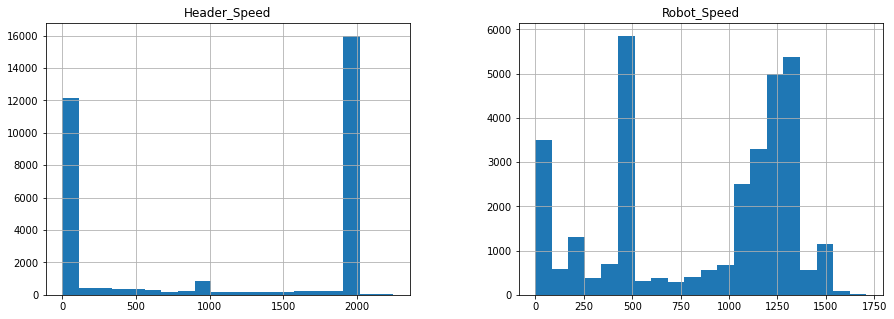

In [187]:
concatenado[concatenado["IdCelda"]==112][["Header_Speed", "Robot_Speed"]].hist(bins=20, figsize=(15,5))

In [78]:
concatenado[concatenado["IdCelda"]==112][["Header_Speed", "Robot_Speed"]].describe()

,Header_Speed,Robot_Speed
count,32917.000000,32922.000000
mean,1099.726646,847.918109
std,933.212963,477.030123
min,0.000000,0.000000
25%,0.000000,448.000000
50%,1725.000000,1064.000000
75%,1986.000000,1260.000000
max,2243.000000,1708.000000


array([[<AxesSubplot:title={'center':'Header_Speed'}>,
        <AxesSubplot:title={'center':'Robot_Speed'}>]], dtype=object)

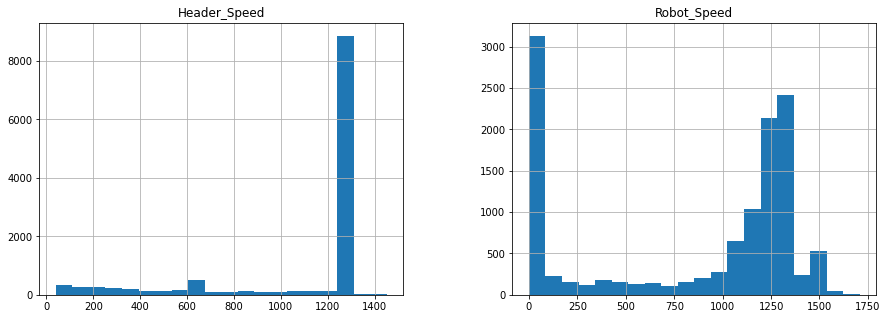

In [201]:
VelocidadHeader[VelocidadHeader["IdCelda"]==112][["Header_Speed", "Robot_Speed"]].hist(bins=20, figsize=(15,5))

<AxesSubplot:>

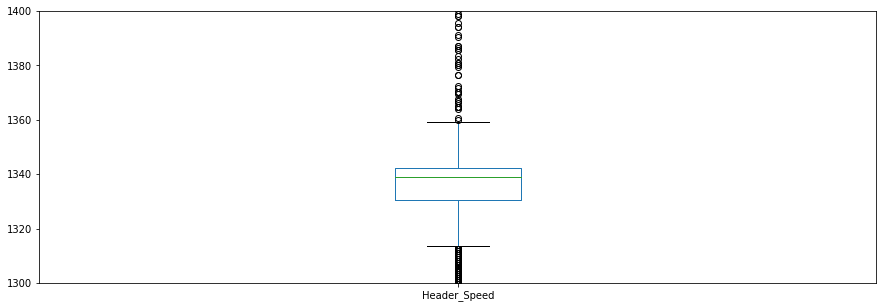

In [200]:
VelocidadHeader[VelocidadHeader["IdCelda"]==34]["Header_Speed"].plot(kind='box', figsize=(15,5), ylim=(1300,1400))

In [268]:
np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])